In [130]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loaded required libraries

In [131]:
train = pd.read_excel('D:\DataTrained Projects\Evaluation Projects\Week 3\Flight_Ticket_Participant_Datasets/Data_train.xlsx')
test = pd.read_excel('D:\DataTrained Projects\Evaluation Projects\Week 3\Flight_Ticket_Participant_Datasets/Test_set.xlsx')

#imported datasets from their location

In [40]:
print(train.shape)
print(test.shape)

(10683, 11)
(2671, 10)


In [41]:
print(train.info())
print('----------------------------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0  

We can see that almost all the columns except Price in train dataset are of object datatype and test column is having all object datatype columns.

In [42]:
print(train.isnull().values.any())
train.isnull().sum()

True


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two null values in entire dataset(one in Route and other in Additional_Info), so we can drop those na values

In [132]:
train.dropna(inplace=True)

In [133]:
print(train.shape)

(10682, 11)


In [134]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [135]:
print(train['Airline'].value_counts())
print('-------------------')
print(train['Source'].value_counts())
print('-------------------')
print(train['Destination'].value_counts())
print('-------------------')
print(train['Route'].value_counts())
print('-------------------')
print(train['Dep_Time'].value_counts())
print('-------------------')
print(train['Arrival_Time'].value_counts())
print('-------------------')
print(train['Duration'].value_counts())
print('-------------------')
print(train['Total_Stops'].value_counts())
print('-------------------')
print(train['Additional_Info'].value_counts())

#we get the information about different values present in each column

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-------------------
DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD   

In [47]:
train['day'] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train['month'] = train['Date_of_Journey'].str.split('/').str[1].astype(int)
train.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [48]:
train['dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['dep_minutes'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop(['Dep_Time'], axis = 1, inplace = True)

In [49]:
train['Arrival_hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arrival_min'] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(['Arrival_Time'], axis = 1, inplace = True)

In [50]:
test['day'] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test['month'] = test['Date_of_Journey'].str.split('/').str[1].astype(int)
test.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [52]:
test['dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop(['Dep_Time'], axis = 1, inplace = True)

In [53]:
test['Arrival_hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_min'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'], axis = 1, inplace = True)

Converted date and time to seperate columns.

In [54]:
train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [55]:
test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


<AxesSubplot:xlabel='month', ylabel='count'>

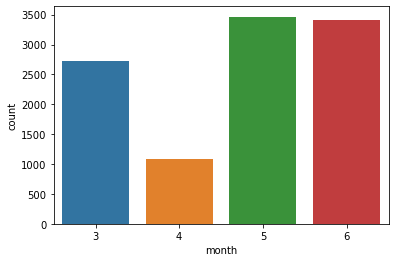

In [72]:
sns.countplot(x='month',data=train)

We could see that more number of flights are present during 5,6 months

<AxesSubplot:xlabel='day', ylabel='count'>

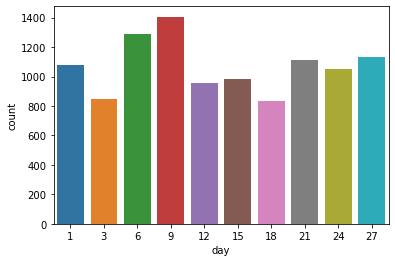

In [71]:
sns.countplot(x='day',data=train)

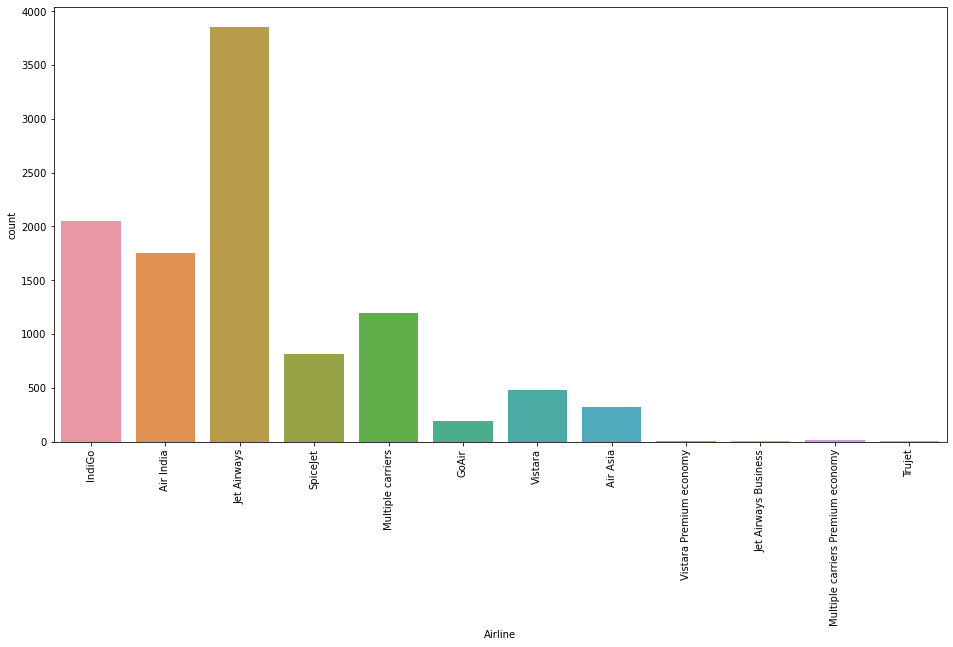

In [70]:
plt.figure(figsize=[16,8])b
sns.countplot(x='Airline',data=train)
plt.xticks(rotation = 90)
plt.show()

We can see that jet airways is having more number of flights when compared with other companies.

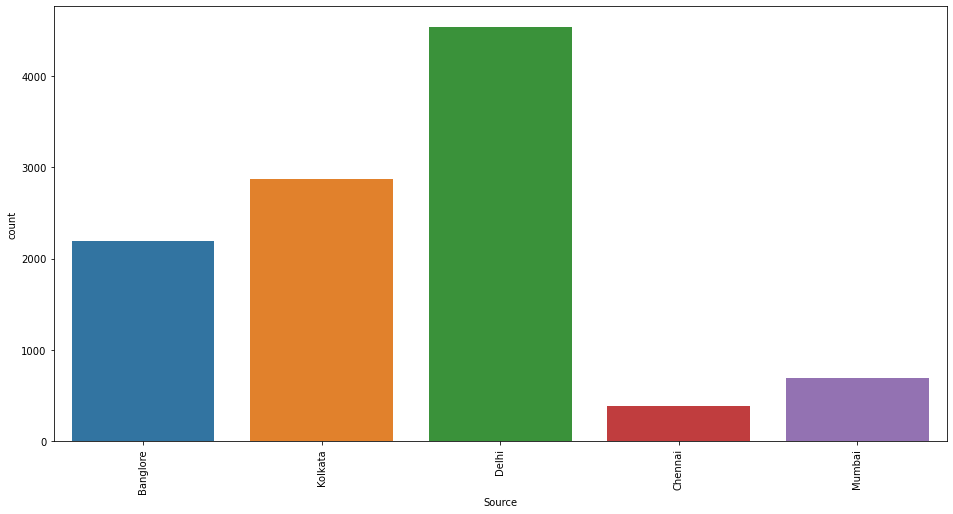

In [136]:
plt.figure(figsize=[16,8])
sns.countplot(x='Source',data=train)
plt.xticks(rotation = 90)
plt.show()

More number of flights are originating from Delhi

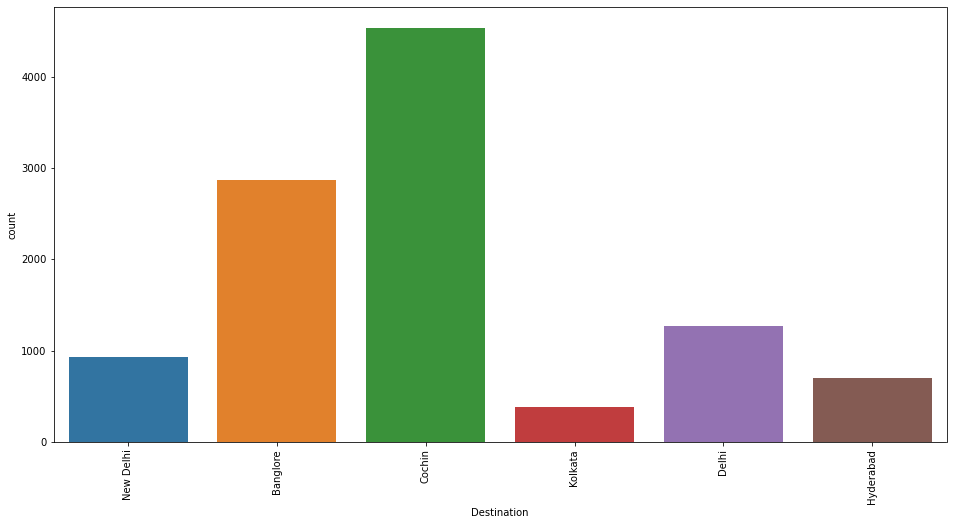

In [74]:
plt.figure(figsize=[16,8])
sns.countplot(x='Destination',data=train)
plt.xticks(rotation = 90)
plt.show()

More number of flights has their destination as Cochin

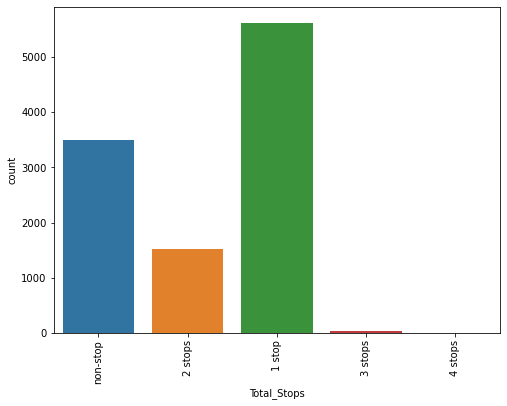

In [137]:
plt.figure(figsize=[8,6])
sns.countplot(x='Total_Stops',data=train)
plt.xticks(rotation = 90)
plt.show()

More number of flights are of 1stop

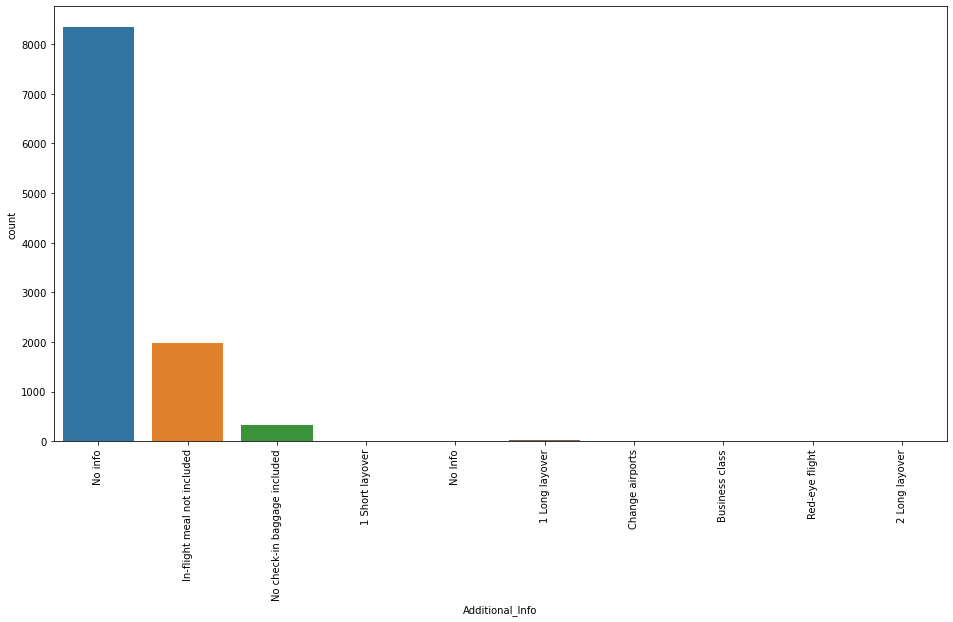

In [80]:
plt.figure(figsize=[16,8])
sns.countplot(x='Additional_Info',data=train)
plt.xticks(rotation = 90)
plt.show()

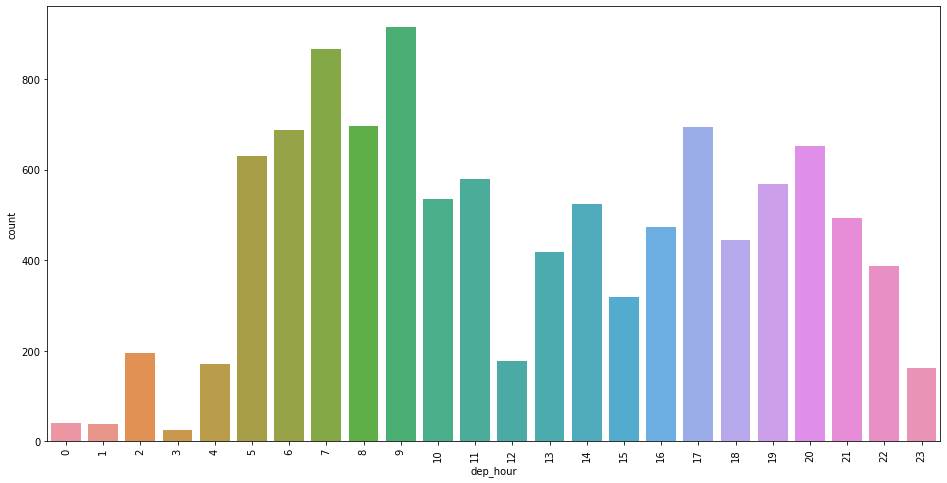

In [81]:
plt.figure(figsize=[16,8])
sns.countplot(x='dep_hour',data=train)
plt.xticks(rotation = 90)
plt.show()

We can observe that more number of fligts are leaving between 5am-10am and 5pm-9pm

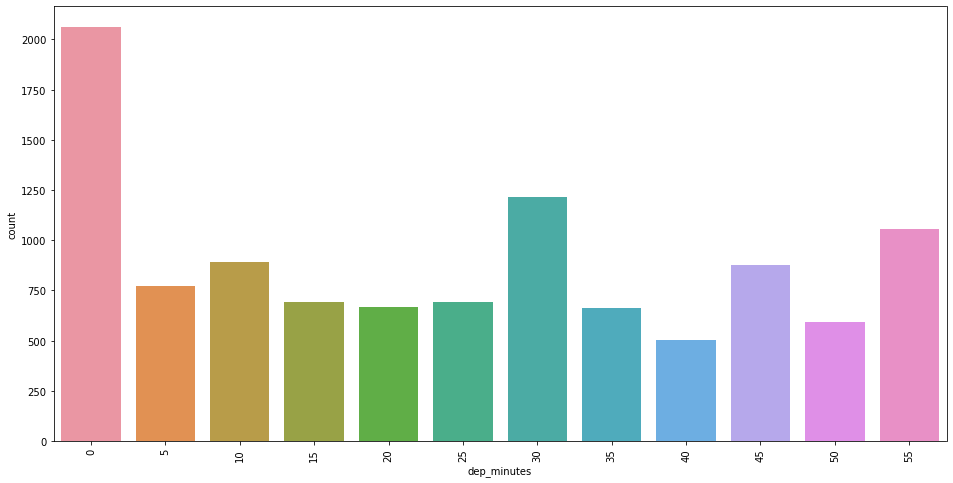

In [82]:
plt.figure(figsize=[16,8])
sns.countplot(x='dep_minutes',data=train)
plt.xticks(rotation = 90)
plt.show()

We can observe that more flights are leaving before starting 5 minutes of every hour

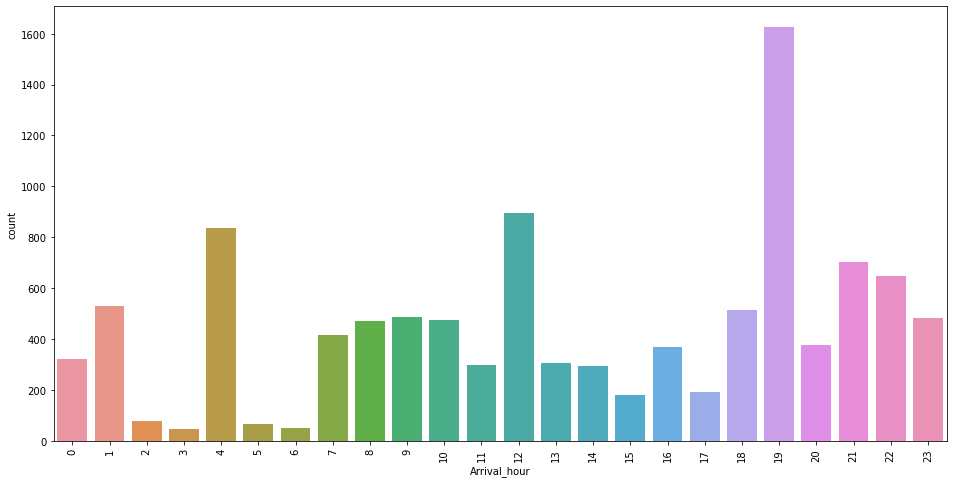

In [83]:
plt.figure(figsize=[16,8])
sns.countplot(x='Arrival_hour',data=train)
plt.xticks(rotation = 90)
plt.show()

More number of flights are arriving at 7pm,12pm,4am,9pm,10pm. 

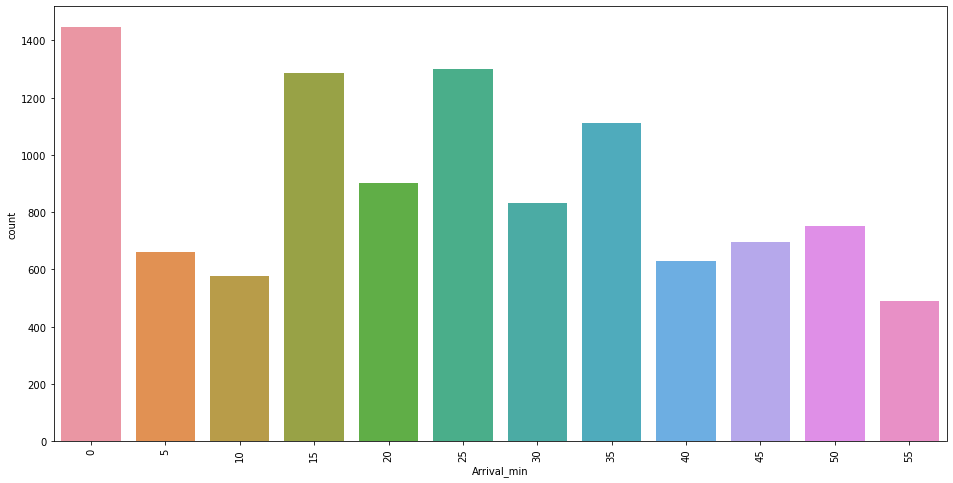

In [85]:
plt.figure(figsize=[16,8])
sns.countplot(x='Arrival_min',data=train)
plt.xticks(rotation = 90)
plt.show()

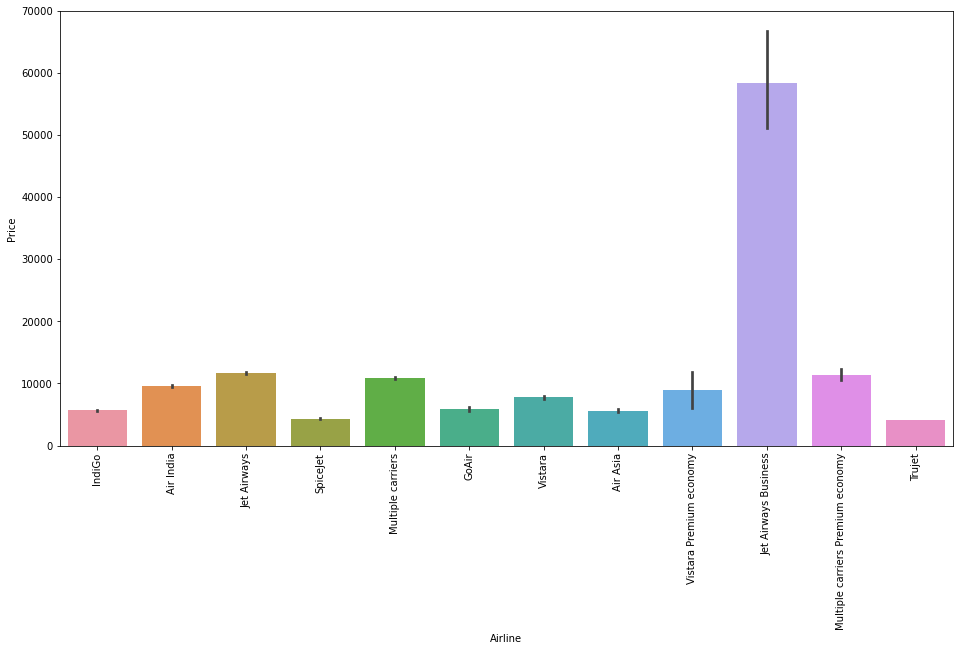

In [88]:
plt.figure(figsize=[16,8])
sns.barplot(x='Airline',y='Price',data=train)
plt.xticks(rotation = 90)
plt.show()

Jet airways business ticket is having highest price ticket when compared with all other companies

In [90]:
print(train.info())
print('----------------------------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   day              10682 non-null  int32 
 9   month            10682 non-null  int32 
 10  dep_hour         10682 non-null  int64 
 11  dep_minutes      10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
dtypes: int32(2), int64(5), object(7)
memory usage: 1.5+ MB
None
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entr

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Airline'] = le.fit_transform(train['Airline'])
train['Source'] = le.fit_transform(train['Source'])
train['Destination'] = le.fit_transform(train['Destination'])
train['Route'] = le.fit_transform(train['Route'])
train['Duration'] = le.fit_transform(train['Duration'])
train['Total_Stops'] = le.fit_transform(train['Total_Stops'])
train['Additional_Info'] = le.fit_transform(train['Additional_Info'])

test['Airline'] = le.fit_transform(test['Airline'])
test['Source'] = le.fit_transform(test['Source'])
test['Destination'] = le.fit_transform(test['Destination'])
test['Route'] = le.fit_transform(test['Route'])
test['Duration'] = le.fit_transform(test['Duration'])
test['Total_Stops'] = le.fit_transform(test['Total_Stops'])
test['Additional_Info'] = le.fit_transform(test['Additional_Info'])

Converted all categorial columns to numerical using label encoder

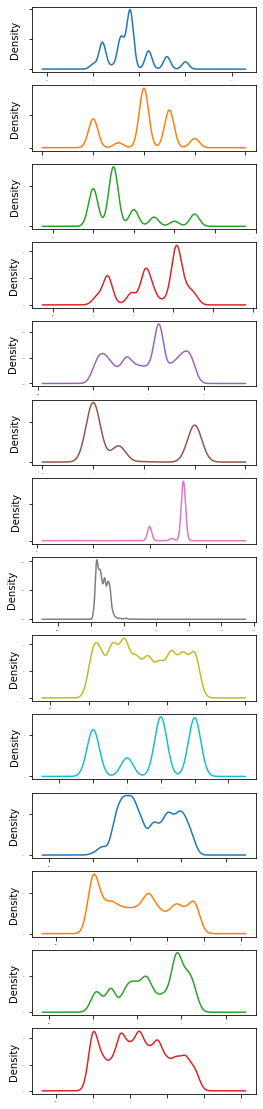

In [92]:
train.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

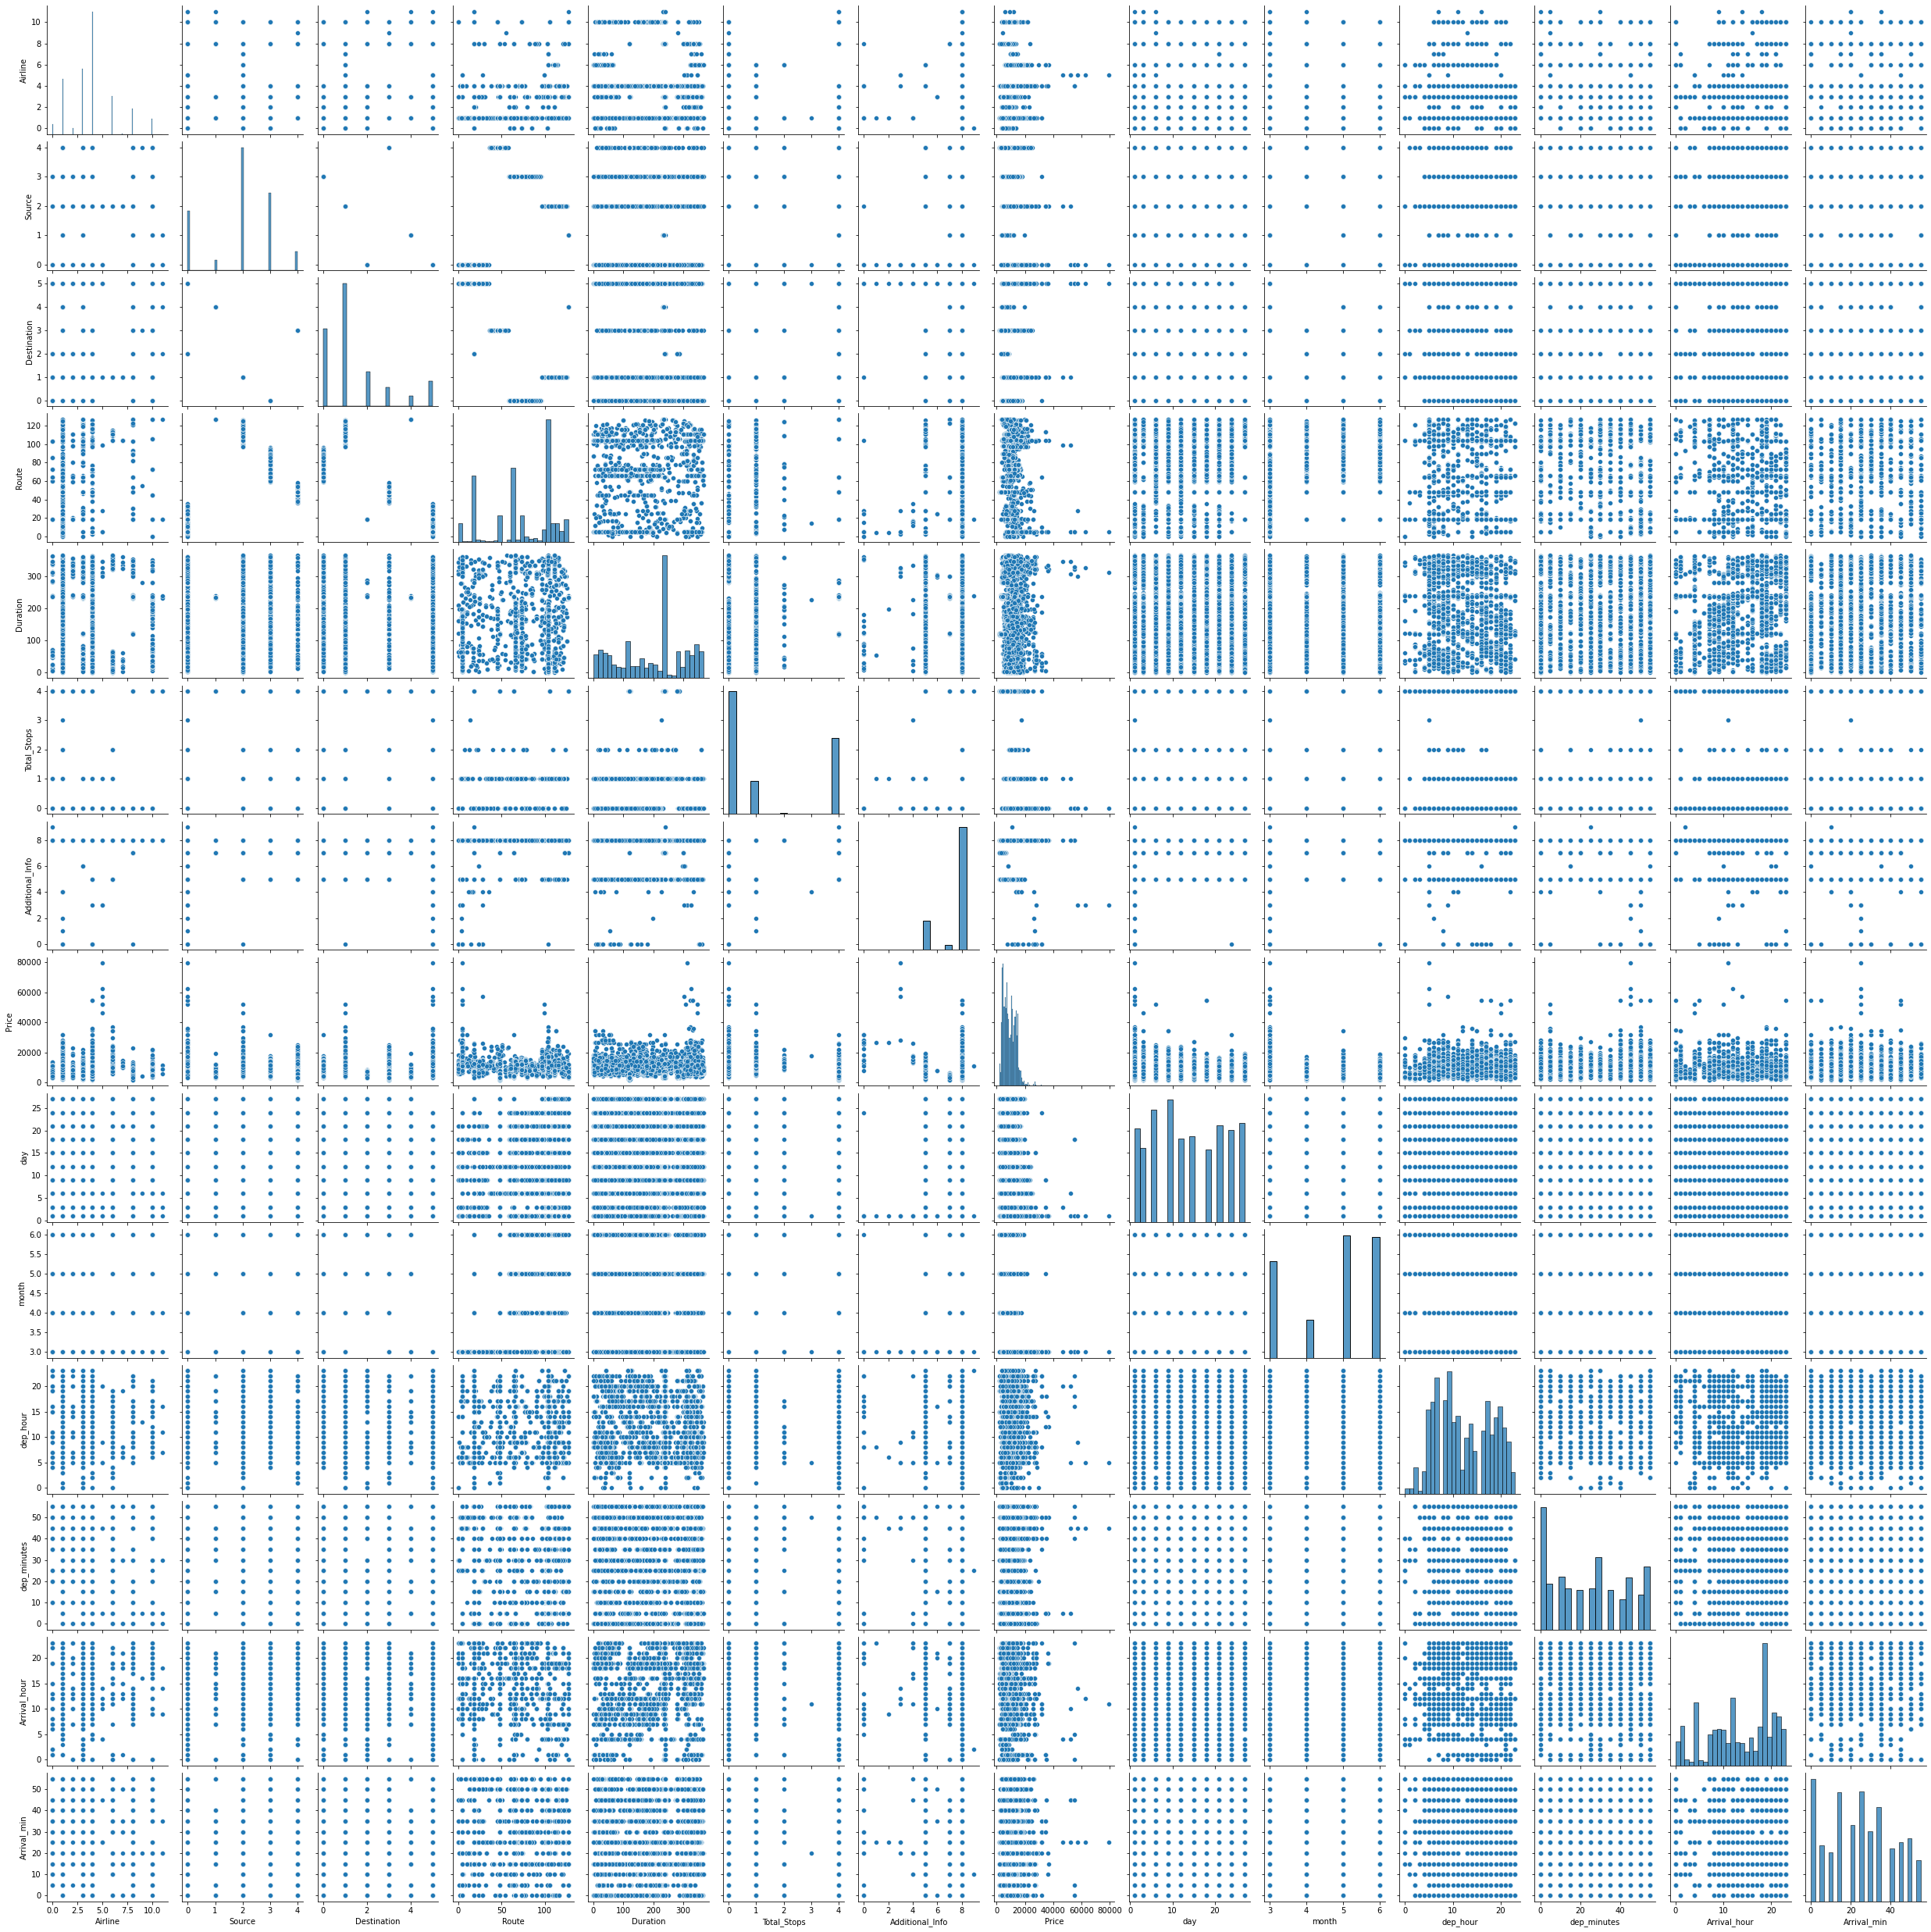

In [93]:
sns.pairplot(train)
plt.show()

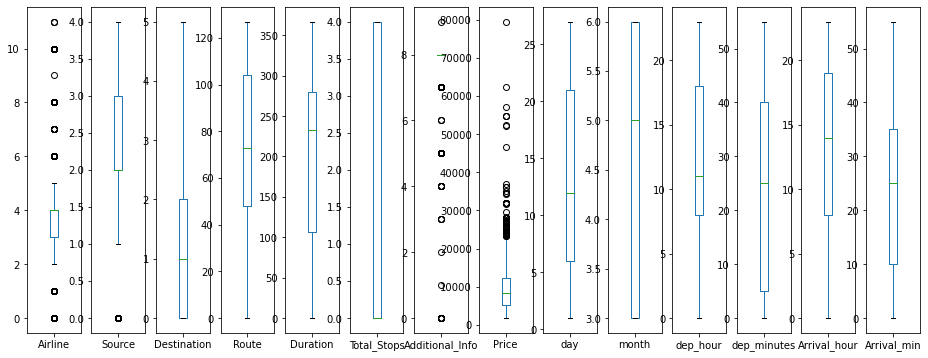

In [101]:
train.plot(kind='box',subplots=True,figsize=[16,6])
plt.show()

We have few outliers in dataset that can be considered

In [94]:
corr_mat = train.corr()
corr_mat

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_minutes,Arrival_hour,Arrival_min
Airline,1.000000,-0.013397,0.018446,0.025214,0.027886,0.035973,-0.060748,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,-0.192009,-0.225605,-0.022109,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,0.022029,0.337872,0.026821,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,-0.062078,-0.437749,0.035152,0.164149,0.081632,0.244186,-0.075002,-0.068071,0.013898,-0.173352
Duration,0.027886,-0.192009,0.022029,-0.062078,1.000000,0.175191,0.080166,-0.144280,0.016500,-0.032768,0.041508,0.030876,0.024511,0.059971
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,0.175191,1.000000,0.164054,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,0.080166,0.164054,1.000000,-0.065463,-0.016296,-0.051491,-0.050983,-0.019392,0.026204,0.041310
Price,-0.039565,0.015999,-0.071122,0.164149,-0.144280,-0.571221,-0.065463,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
day,0.026137,0.004902,-0.041025,0.081632,0.016500,0.029225,-0.016296,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
month,0.024674,0.183268,-0.364682,0.244186,-0.032768,-0.026328,-0.051491,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626


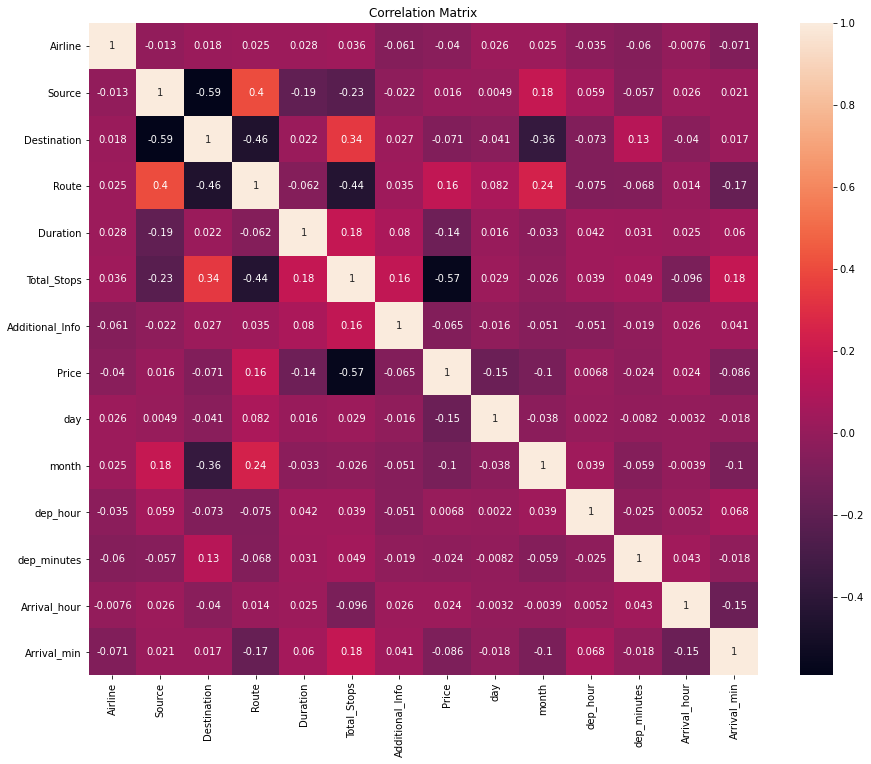

In [97]:
plt.figure(figsize=[15,12])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [100]:
corr_target = train.corrwith(train['Price'], axis=0)
corr_target

Airline           -0.039565
Source             0.015999
Destination       -0.071122
Route              0.164149
Duration          -0.144280
Total_Stops       -0.571221
Additional_Info   -0.065463
Price              1.000000
day               -0.153774
month             -0.103643
dep_hour           0.006799
dep_minutes       -0.024458
Arrival_hour       0.024244
Arrival_min       -0.086155
dtype: float64

Total_Stops is having strong relation with the price of the ticket

In [102]:
x = train.drop('Price', axis=1)
y = train['Price']

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [104]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.39195827267098826

In [114]:
from sklearn.linear_model import LinearRegression

reg_test = LinearRegression()
reg_test.fit(x_test,y_test)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.3948522893687121

In [106]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.8599457219281296

In [115]:
from sklearn.ensemble import RandomForestRegressor

RFR_test = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR_test.fit(x_test, y_test)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.9632205440284018

In [117]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(x_train, y_train)
y_pred=KNR.predict(x_test)
r2_score(y_test, y_pred)

0.6209851416621182

In [118]:
from sklearn.neighbors import KNeighborsRegressor

KNR_test = KNeighborsRegressor()
KNR_test.fit(x_test, y_test)
y_pred=KNR.predict(x_test)
r2_score(y_test, y_pred)

0.6209851416621182

In [110]:
from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_train)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.12692991630232786

In [119]:
from sklearn.svm import SVR

SVR_Reg_test = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg_test.fit(x_test, y_test)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.08700424526017103

In [112]:
from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 0)
RTD.fit(x_train, y_train)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.7823646116297907

In [120]:
from sklearn.tree import DecisionTreeRegressor
RTD_test = DecisionTreeRegressor(random_state = 0)
RTD_test.fit(x_test, y_test)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.9991699698441794

In [121]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg, x, y, cv=5)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.3755811551967624


In [122]:
scr=cross_val_score(RFR, x, y, cv=5)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  0.8788189681107182


In [123]:
scr=cross_val_score(KNR, x, y, cv=5)
print('Cross validation score of KNR : ',scr.mean())

Cross validation score of KNR :  0.6389981113340688


In [124]:
scr=cross_val_score(SVR_Reg, x, y, cv=5)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  0.11465603125824342


In [125]:
scr=cross_val_score(RTD, x, y, cv=5)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  0.8041384195209055


In [126]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg_test, x, y, cv=5)
print('Cross validation score of Linear Regression : ',scr.mean())

scr=cross_val_score(RFR_test, x, y, cv=5)
print('Cross validation score of RFR : ',scr.mean())

scr=cross_val_score(KNR_test, x, y, cv=5)
print('Cross validation score of KNR : ',scr.mean())

scr=cross_val_score(SVR_Reg_test, x, y, cv=5)
print('Cross validation score of SVR : ',scr.mean())

scr=cross_val_score(RTD_test, x, y, cv=5)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of Linear Regression :  0.3755811551967624
Cross validation score of RFR :  0.8788189681107182
Cross validation score of KNR :  0.6389981113340688
Cross validation score of SVR :  0.11465603125824342
Cross validation score of RTD :  0.8041384195209055


Random Forest Regressor is having least difference between cross validation score and accuracy score so we can choose  Random Forest Regressor as best model.

In [127]:
import joblib
joblib.dump(RFR,'Flight_Ticket.pkl')

['Flight_Ticket.pkl']